# Importing libraries



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx",index_col = 0)

In [4]:
pd.set_option('display.max_columns', None)

### display all the columns in dataset in jupyternotebook

In [5]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, train to train
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

## checking null values

In [7]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

### There are no null values in the data set

In [8]:
df.Salary.describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

### Gives description about salary column

<AxesSubplot:xlabel='Salary'>

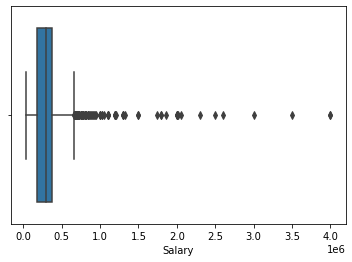

In [9]:
sns.boxplot(df.Salary)

### With the help of box plot we find that outliers are present in Salary column

### outliers can be removed by using IQR(inter quartile range)

In [10]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
Q1,Q3

(180000.0, 370000.0)

In [11]:
IQR = Q3 - Q1

In [12]:
IQR 

190000.0

In [13]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [14]:
lower_limit,upper_limit

(-105000.0, 655000.0)

In [15]:
df1 = df[df.Salary <= upper_limit]

In [16]:
df.shape[0]-df1.shape[0]

109

<AxesSubplot:xlabel='Salary'>

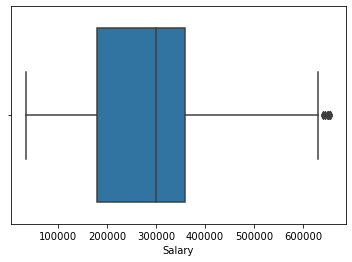

In [17]:
sns.boxplot(df1.Salary)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

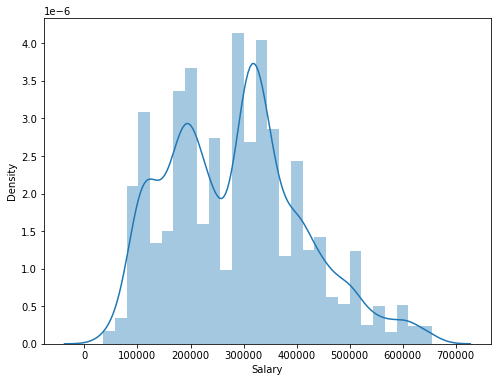

In [18]:
plt.figure(figsize = (8,6))
sns.distplot(df1.Salary)

###  After removal of outliers distribution follows bell curve and its median value is around 300k

In [19]:
columns_to_drop = ["ID",'DOL',"Designation",'CollegeID',"CollegeCityID"]
df1 = df1.drop(columns = columns_to_drop)

In [20]:
df1.head()

,Salary,DOJ,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,420000,2012-06-01,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,500000,2013-09-01,Indore,m,1989-10-04,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,325000,2014-06-01,Chennai,f,1992-08-03,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,200000,2014-03-01,Manesar,m,1991-02-27,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
train,300000,2014-06-01,Hyderabad,m,1992-07-02,89.92,state board,2010,87.0,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608


In [21]:
df1["DOJ"] = pd.DatetimeIndex(df1['DOJ']).year

<AxesSubplot:xlabel='DOJ', ylabel='count'>

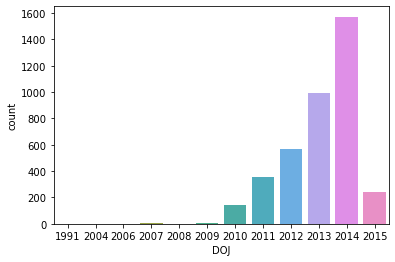

In [22]:
sns.countplot(df1["DOJ"])

### There is a steady increase in number of candidates joining till 2014 and maximum people joined in 2014

In [23]:
df1.JobCity=df1.JobCity.apply(lambda x: 'Others' if x==-1 else x)

In [24]:
df1.JobCity.value_counts()

Bangalore                  603
Others                     452
Noida                      357
Hyderabad                  329
Pune                       284
                          ... 
Navi Mumbai , Hyderabad      1
 mumbai                      1
pondy                        1
Guwahati                     1
Navi mumbai                  1
Name: JobCity, Length: 327, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'Noida'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Pune'),
  Text(5, 0, 'Chennai'),
  Text(6, 0, 'New Delhi'),
  Text(7, 0, 'Gurgaon'),
  Text(8, 0, 'Mumbai'),
  Text(9, 0, 'Kolkata')])

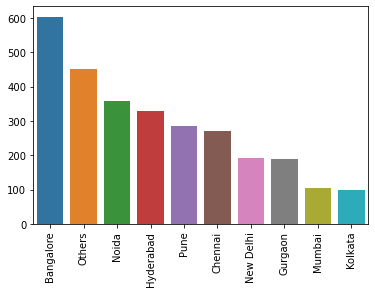

In [25]:
sns.barplot(df1.JobCity.value_counts()[:10].index,df1.JobCity.value_counts()[:10].values)
plt.xticks(rotation = 90)

### Most of the candidates job city is Banglore followed by Noida and Hyderabad

<AxesSubplot:xlabel='Gender', ylabel='count'>

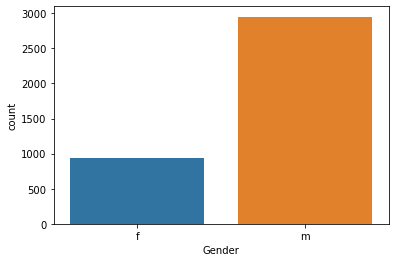

In [26]:
sns.countplot(df1.Gender)

### More number of male candidates are present

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

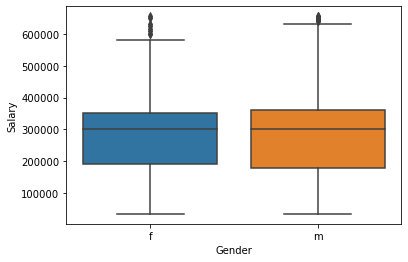

In [27]:
sns.boxplot(df1.Gender,df1.Salary)

### There is in't much difference in salaries based on gender but when consider maximum salary range for men is high

In [28]:
df1["DOB"] = pd.DatetimeIndex(df1['DOB']).year

In [29]:
df1["DOB"].value_counts()

1991    963
1992    848
1990    760
1989    499
1993    291
1988    287
1987    104
1986     59
1994     31
1985     25
1984     11
1983      4
1982      2
1995      2
1997      1
1977      1
1981      1
Name: DOB, dtype: int64

In [30]:
df1["AGE"] = 2015 - df1["DOB"] 

<AxesSubplot:xlabel='AGE', ylabel='count'>

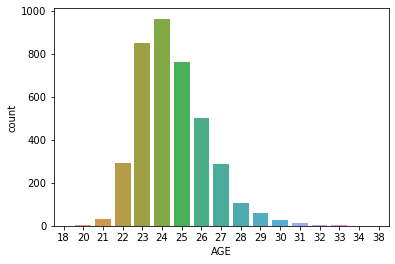

In [31]:
sns.countplot(df1.AGE)

### most of the candidates age is between 23 to 26

In [32]:
def study(board):
    if board == "cbse":
        return "cbse"
    elif board == "icse":
        return "icse"
    else:
        return "state board"

In [33]:
df1['10board']=df1['10board'].apply(study)
df1['12board']=df1['12board'].apply(study)

<AxesSubplot:xlabel='10board', ylabel='count'>

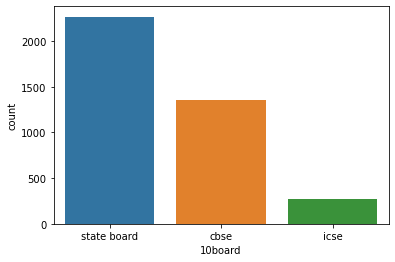

In [34]:
sns.countplot(df1['10board'])

<AxesSubplot:xlabel='12board', ylabel='count'>

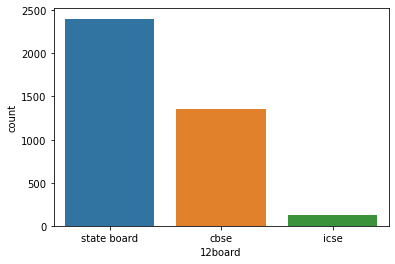

In [35]:
sns.countplot(df1['12board'])

### Most of the candidates are from Stateboard followed by Cbse and Icse 

<AxesSubplot:xlabel='10board'>

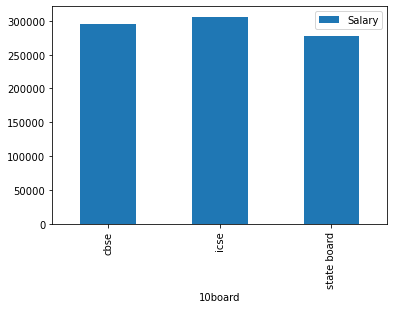

In [36]:
pd.pivot_table(index = '10board',values = 'Salary',data = df1).plot(kind = "bar")

<AxesSubplot:xlabel='12board'>

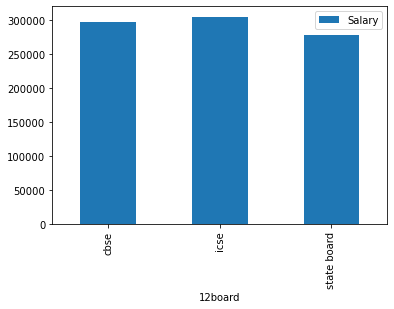

In [37]:
pd.pivot_table(index = '12board',values = 'Salary',data = df1).plot(kind = "bar")

### Mean salaries of icse candidates are higher

In [38]:
df1.loc[df1['collegeGPA']<=10,"collegeGPA"] *=10

In [39]:
df1["Average_Score"] = (df1["10percentage"]+df1["12percentage"]+df1['collegeGPA'])/3

### Average of 10th,12th,college percentages are taken and allocted grades for the marks

In [40]:
def grade(average_marks):
    if average_marks>=75:
        return 'A'
    elif average_marks>=60 and average_marks<75:
        return 'B'
    elif average_marks>=50 and average_marks<60:
        return 'C'
    else:
        return 'D'

In [41]:
df1["Grade"]=df1["Average_Score"].apply(grade)

<AxesSubplot:xlabel='Grade', ylabel='Salary'>

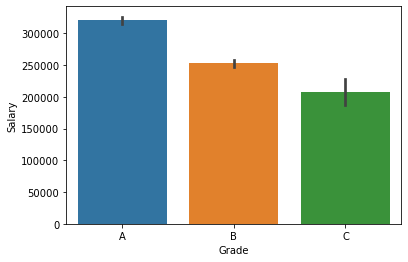

In [42]:
sns.barplot(df1.Grade,df1.Salary)

### candidates with higher grades are getting higher salaries 

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

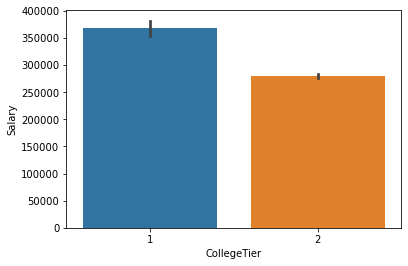

In [43]:
 sns.barplot(df1.CollegeTier,df1.Salary)

### Salaries of college tier 1 are higher

<AxesSubplot:xlabel='Degree', ylabel='count'>

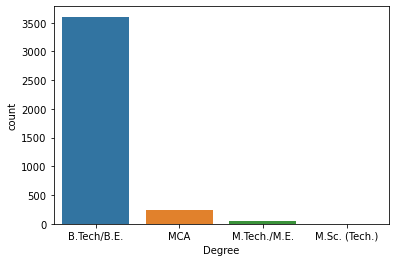

In [44]:
sns.countplot(df1.Degree)

### Most of the candidates are having BTech degree

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

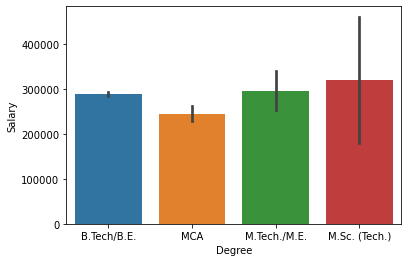

In [45]:
sns.barplot(df1.Degree,df1.Salary)

### Salaries of BTech and Mtech are higher than MCA

<AxesSubplot:xlabel='CollegeState'>

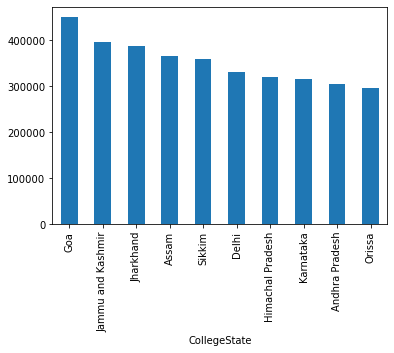

In [46]:
df1.groupby('CollegeState')["Salary"].mean().sort_values(ascending = False)[:10].plot(kind = "bar")

### Goa,Jammu&Kashmir,Jharkand,Assam are the states having higher mean salaries

<AxesSubplot:xlabel='CollegeState'>

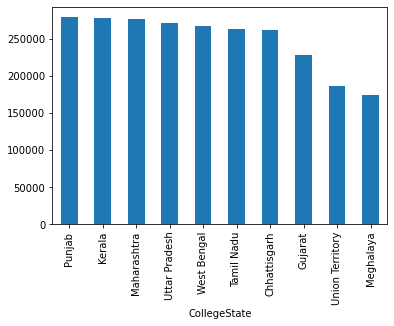

In [47]:
df1.groupby('CollegeState')["Salary"].mean().sort_values(ascending = False)[-10:].plot(kind = "bar")

### Meghalaya,Union teritory,Gujarat are the states with low mean Salaries

In [48]:
dic={'CSC':['computer engineering','information technology','computer science & engineering','computer application','information science engineering','embedded systems technology','computer science and technology','telecommunication engineering','computer and communication engineering',
       'information & communication technology', 'information science','computer networking','computer science'],
    'Mech':['mechanical engineering','instrumentation and control engineering','mechanical and automation','industrial & production engineering','control and instrumentation engineering','metallurgical engineering','aeronautical engineering','mechatronics','automobile/automotive engineering', 'mechanical & production engineering','power systems and automation', 'instrumentation engineering','internal combustion engine'],
    'ECE':[ 'electronics and communication engineering','electronics & telecommunications','electronics and computer engineering','applied electronics and instrumentation','electronics & instrumentation eng', 'electronics and instrumentation engineering','electronics engineering','telecommunication engineering','electronics'],
    'EEE':['electronics and electrical engineering','electrical engineering','electrical and power engineering'],
    'CIVIL':['civil engineering','ceramic engineering'],
    'CHEMICAL':['biomedical engineering','polymer technology','biotechnology','chemical engineering']
    }

In [49]:
def spec(stream):
    if stream in dic['CSC']:
        return 'CSC'
    elif stream in dic['Mech']:
        return 'Mech'
    elif stream in dic['ECE']:
        return 'ECE'
    elif stream in dic['EEE']:
        return 'EEE'
    elif stream in dic['CIVIL']:
        return 'CIVIL'
    elif stream in dic['CHEMICAL']:
        return 'Chemical'
    else:
        return 'others'

In [50]:
df1.Specialization = df1.Specialization.apply(spec)

<AxesSubplot:xlabel='Specialization'>

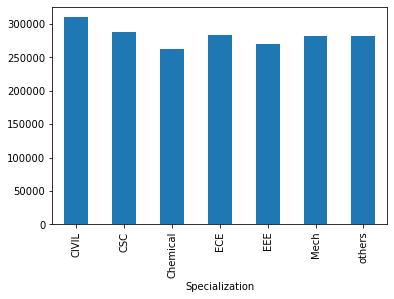

In [51]:
df1.groupby("Specialization")["Salary"].mean().plot(kind = "bar")

### Civil Engineers are getting higher salaries and least is for Chemical Engineering

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

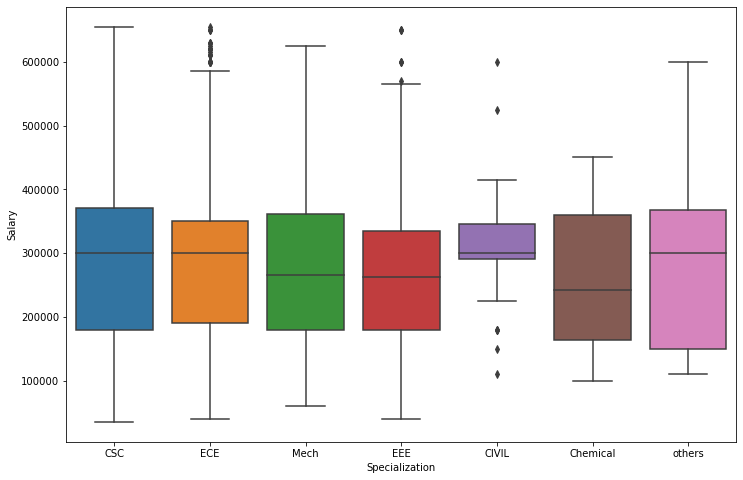

In [52]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "Specialization",y= "Salary",data = df1)

### Base salary for civil is high

In [53]:
df1.GraduationYear.value_counts()

2013    1163
2014    1024
2012     832
2011     484
2010     259
2015      89
2009      21
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

In [54]:
df1.GraduationYear=df1.GraduationYear.apply(lambda x: 2013 if x==0 else x)

In [55]:
df1.GraduationYear.value_counts()

2013    1164
2014    1024
2012     832
2011     484
2010     259
2015      89
2009      21
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

<AxesSubplot:xlabel='GraduationYear'>

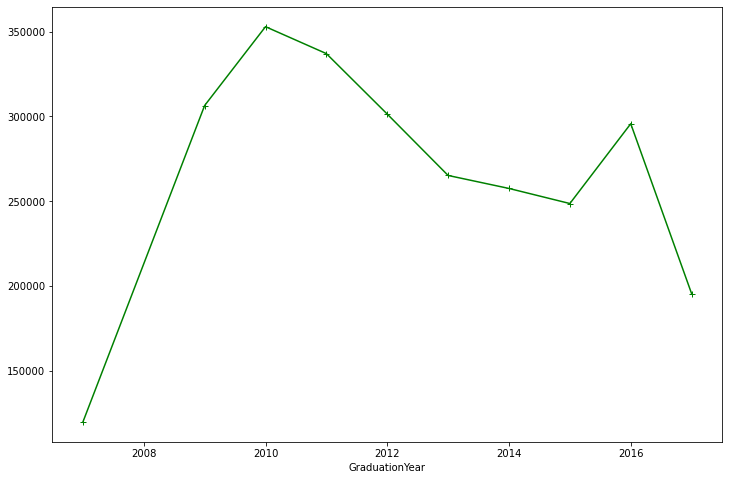

In [56]:
plt.figure(figsize = (12,8))
df1.groupby('GraduationYear')["Salary"].mean().plot(color = "green",marker = "+")

### Mean salaries gradually raised till 2010 and later it decreased. There was a steady increase in the year 2015

In [57]:
df1.loc[:,['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']] = df1.loc[:,['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1,0)

In [58]:
df1.head()

,Salary,DOJ,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AGE,Average_Score,Grade
train,420000,2012,Bangalore,f,1990,84.30,state board,2007,95.8,state board,2,B.Tech/B.E.,CSC,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,86.033333,A
train,500000,2013,Indore,m,1989,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,ECE,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,80.153333,A
train,325000,2014,Chennai,f,1992,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,CSC,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,74.400000,B
train,200000,2014,Manesar,m,1991,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,ECE,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,76.233333,A
train,300000,2014,Hyderabad,m,1992,89.92,state board,2010,87.0,state board,2,B.Tech/B.E.,ECE,76.32,0,Karnataka,2014,560,555,620,-1.000000,645,0,407,0,0,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,23,84.413333,A


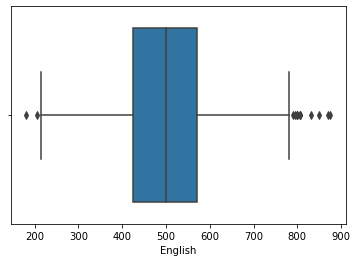

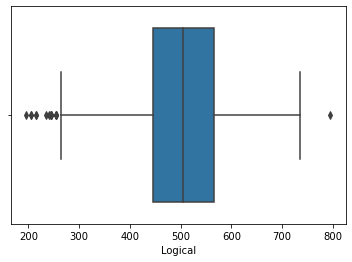

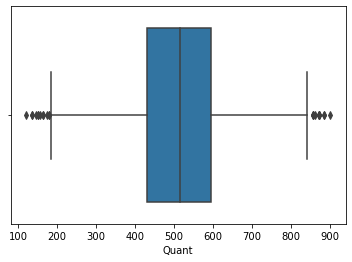

In [59]:
col = ["English",'Logical','Quant']
for i in col:
    sns.boxplot(df1[i])
    plt.show()

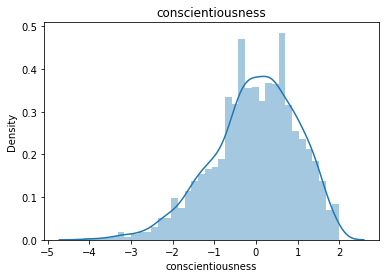

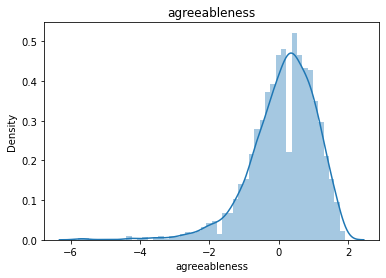

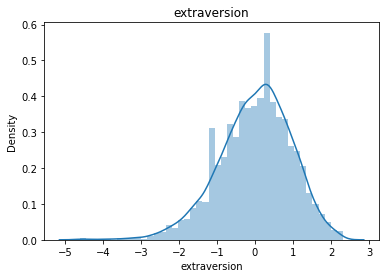

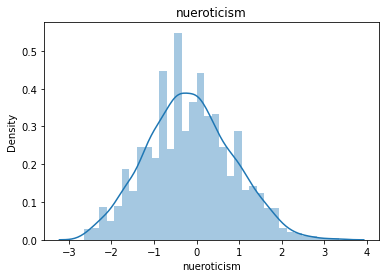

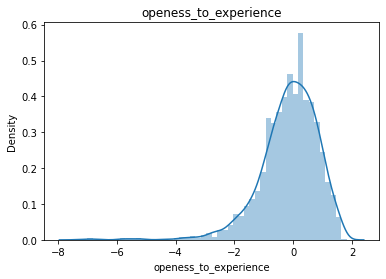

In [60]:
personality = ["conscientiousness","agreeableness","extraversion","nueroticism","openess_to_experience"]
for i in personality:
    sns.distplot(df1[i])
    plt.title(i)
    plt.show()

### All the personality test columns are Normalised and having a bell curve

In [61]:
columns=['DOJ','DOB','12graduation','Average_Score','AGE']

<AxesSubplot:>

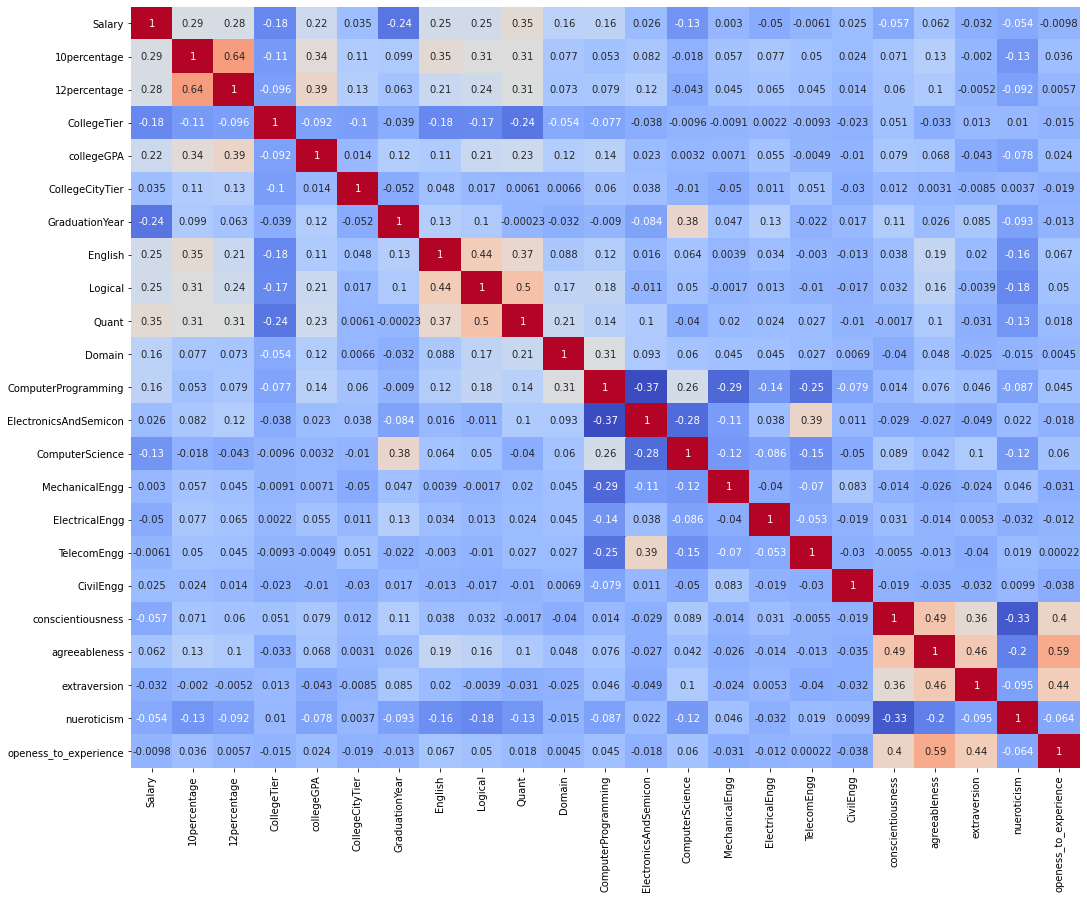

In [62]:
plt.figure(figsize = (17,14))
sns.heatmap(df1.drop(columns = columns).corr(),annot = True,cbar = False,cmap = "coolwarm")

### 10th percentage and 12th percentage are highly correlated
###  Salary is very much depending on Aptitude marks and Academic marks

# SCALING

### Numerical columns

In [74]:
num_col=df1[['10percentage',"12percentage","collegeGPA","English","Logical","Quant","ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"]]

In [89]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(num_col)
df3 =pd.DataFrame(scaled,columns = num_col.columns,index = num_col.index )

In [90]:
df3.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
train,0.654534,1.943987,0.866213,0.137446,0.974367,0.110201,0.452846,-0.611149,-0.528519,-0.240586,-0.201765,-0.316642,-0.094502
train,0.766269,0.961941,-0.212108,1.856178,1.263614,2.208505,-1.725531,2.338639,-0.528519,-0.240586,-0.201765,-0.316642,-0.094502
train,0.725638,-0.565685,-0.220257,1.092297,0.511573,-1.165238,0.208084,-0.611149,-0.528519,-0.240586,-0.201765,-0.316642,-0.094502
train,0.014601,0.216314,0.309397,0.423901,1.437162,-0.383517,-1.725531,0.863745,-0.528519,-0.240586,-0.201765,-0.316642,-0.094502
train,1.225396,1.143802,0.638054,0.567129,0.627271,0.891922,1.431892,-0.611149,1.788973,-0.240586,-0.201765,-0.316642,-0.094502


### Categorical columns

In [92]:
cat_col = df1.loc[:,df1.dtypes==np.object]

In [94]:
df4 = pd.get_dummies(cat_col)

,JobCity_ Chennai,JobCity_ Delhi,JobCity_ Mumbai,JobCity_ Pune,JobCity_ ariyalur,JobCity_ bangalore,JobCity_ mumbai,"JobCity_A-64,sec-64,noida",JobCity_AM,JobCity_Agra,JobCity_Ahmedabad,JobCity_Ahmedabad,JobCity_Ahmednagar,"JobCity_Al Jubail,Saudi Arabia",JobCity_Allahabad,JobCity_Alwar,JobCity_Ambala,JobCity_Ambala City,JobCity_Asansol,JobCity_Asifabadbanglore,JobCity_Aurangabad,JobCity_Australia,JobCity_BANGALORE,JobCity_BANGALORE,JobCity_BANGLORE,JobCity_BAngalore,JobCity_BHOPAL,JobCity_BHUBANESWAR,JobCity_Baddi HP,JobCity_Bahadurgarh,JobCity_Banagalore,JobCity_Banaglore,JobCity_Bangalore,JobCity_Bangalore,JobCity_Banglore,JobCity_Banglore,JobCity_Bankura,JobCity_Bareli,JobCity_Baripada,JobCity_Baroda,JobCity_Bathinda,JobCity_Beawar,JobCity_Belgaum,JobCity_Bellary,JobCity_Bengaluru,JobCity_Bhagalpur,JobCity_Bharuch,JobCity_Bhilai,JobCity_Bhiwadi,JobCity_Bhopal,JobCity_Bhopal,JobCity_Bhubaneshwar,JobCity_Bhubaneswar,JobCity_Bhubaneswar,JobCity_Bhubneshwar,JobCity_Bikaner,JobCity_Bilaspur,JobCity_Bulandshahar,JobCity_Bundi,JobCity_Burdwan,JobCity_CHENNAI,JobCity_CHEYYAR,JobCity_Calicut,JobCity_Chandigarh,JobCity_Chandigarh,JobCity_Chandrapur,JobCity_Chennai,JobCity_Chennai,JobCity_Chennai & Mumbai,"JobCity_Chennai, Bangalore",JobCity_Coimbatore,JobCity_DELHI,JobCity_Daman and Diu,JobCity_Dausa,JobCity_Dehradun,JobCity_Delhi,JobCity_Delhi/NCR,JobCity_Dhanbad,JobCity_Dharamshala,JobCity_Dharmapuri,JobCity_Dharuhera,JobCity_Ernakulam,JobCity_Faridabad,JobCity_GREATER NOIDA,JobCity_GURAGAON,JobCity_GURGAON,JobCity_GURGOAN,JobCity_Gagret,JobCity_Gajiabaad,JobCity_Gandhi Nagar,JobCity_Gandhinagar,JobCity_Gandhinagar,JobCity_Ganjam,JobCity_Gaziabaad,JobCity_Ghaziabad,JobCity_Gonda,JobCity_Gorakhpur,JobCity_Greater NOIDA,JobCity_Greater Noida,JobCity_Greater noida,JobCity_Gulbarga,JobCity_Gurga,JobCity_Gurgaon,JobCity_Gurgaon,JobCity_Gurgoan,JobCity_Guwahati,JobCity_Gwalior,JobCity_HYDERABAD,JobCity_Haldia,JobCity_Haridwar,JobCity_Hissar,JobCity_Hospete,JobCity_Howrah,JobCity_Hubli,JobCity_Hyderabad,JobCity_Hyderabad,"JobCity_Indirapuram, Ghaziabad",JobCity_Indore,JobCity_Jabalpur,JobCity_Jagdalpur,JobCity_Jaipur,JobCity_Jaipur,JobCity_Jalandhar,JobCity_Jammu,JobCity_Jamshedpur,JobCity_Jaspur,JobCity_Jeddah Saudi Arabia,JobCity_Jhajjar,JobCity_Jhansi,JobCity_Jodhpur,JobCity_Joshimath,JobCity_Jowai,JobCity_KANPUR,JobCity_KOLKATA,JobCity_KOTA,JobCity_Kanpur,JobCity_Kanpur,JobCity_Karad,JobCity_Karnal,JobCity_Khopoli,JobCity_Kochi,JobCity_Kochi/Cochin,"JobCity_Kochi/Cochin, Chennai and Coimbatore",JobCity_Kolkata,JobCity_Kolkata,JobCity_Kolkata`,JobCity_Kota,JobCity_Kurnool,JobCity_LUCKNOW,JobCity_Lucknow,JobCity_Lucknow,JobCity_Ludhiana,JobCity_MEERUT,JobCity_Madurai,JobCity_Madurai,JobCity_Mainpuri,JobCity_Manesar,JobCity_Mangalore,JobCity_Meerut,"JobCity_Mettur, Tamil Nadu",JobCity_Miryalaguda,JobCity_Mohali,JobCity_Mumbai,JobCity_Mumbai,JobCity_Muvattupuzha,JobCity_Muzaffarnagar,JobCity_Mysore,JobCity_Mysore,JobCity_NAVI MUMBAI,JobCity_NEW DELHI,JobCity_NOIDA,JobCity_Nagari,JobCity_Nagpur,JobCity_Nagpur,JobCity_Nalagarh,JobCity_Nanded,JobCity_Nashik,JobCity_Nasikcity,JobCity_Navi Mumbai,"JobCity_Navi Mumbai , Hyderabad",JobCity_Navi mumbai,JobCity_Neemrana,JobCity_Nellore,JobCity_New Delhi,JobCity_New Delhi,JobCity_New delhi,JobCity_Noida,JobCity_Noida,JobCity_Nouda,JobCity_Ongole,JobCity_Others,JobCity_PATNA,JobCity_PILANI,JobCity_PUNE,JobCity_Panchkula,JobCity_Panchkula,JobCity_Pantnagar,JobCity_Patiala,JobCity_Patna,JobCity_Phagwara,JobCity_Pilani,JobCity_Pondicherry,JobCity_Punchkula,JobCity_Pune,JobCity_Pune,JobCity_RAE BARELI,JobCity_RAS AL KHAIMAH,JobCity_Raigarh,JobCity_Raipur,JobCity_Rajasthan,JobCity_Rajkot,JobCity_Ranchi,JobCity_Ranchi,JobCity_Ratnagiri,"JobCity_Rayagada, Odisha",JobCity_Rewari,JobCity_Rohtak,JobCity_Roorkee,JobCity_Rourkela,JobCity_Rudrapur,"JobCity_SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN",JobCity_SHAHDOL,JobCity_Sahibabad,JobCity_Salem,JobCity_Sambalpur,JobCity_Secunderabad,JobCity_Shahdol,JobCity_Shimla